## **Exploring Implementations of INTRO TO QBIO Activities and Exercises**
### Computational Exploration: Counting mRNA and Proteins by Dilution

This notebook is based on an exercice made by a student from 2021/22 (Richmond Crisostomo).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

'''
Generate N random numbers between 0 and 1.
0 to 0.5 --> Heads, 0.5 to 1 --> Tails
Assign proteins to either daughter, essentially.

define function protein_assigner
input: n - number of proteins
output: list of protein designations to daughters
e.g. 
Input: protein_assigner(5)
Output: ['A','B','A','B','B']]
'''

def protein_assigner(n):
  protein_loc = [] # List containing "H" or "T"

  for i in range(n):
    protein_loc.append(np.random.choice(daughter_cells))
  
  return protein_loc

It is necessary to have a calibration that allows conversion of arbritrary fluorescence units to molecular counts - for a more explicit quantitative understanding of the system.


We consider  a linear relationship between observed intensity (I) and number of fusion proteins (N):

$$ I_{tot} = \alpha  N_{tot} $$

with $\alpha$ as an unknown calibration coefficient/factor relating fluorescence to population.


Note that the larger the number of proteins $N$, the larger the fluctuations become. More explcitly, the average difference in intensity between two daughter cells is given by:

$$\langle(I_{1}-I_{2})^{2}\rangle = \alpha I_{tot}$$

with $I_{1}$ and $I_{2}$ as intensities of the 2 daughter cells and more specifically:

$$ I_{tot} = I_{mother} = I_{1}+I_{2}$$

In [2]:
'''
Choose the number of fluorescent molecules N 
in the mother cell and compute intensity I_tot = alpha * N

We set the coefficient alpha to unity, I_tot = 1
'''

N = 1000
I_tot = N # Set alpha to unity
alpha = I_tot/N
daughter_cells = ['A','B']

In [3]:

proteins_assigned = protein_assigner(N) # Run Cell division!

'''
Compute the intensities of the daughters, A and B
'''
cell_A = proteins_assigned.count('A') * alpha
cell_B = proteins_assigned.count('B') * alpha

100
600
1100
1600
2100
2600
3100
3600
4100
4600
5100
5600
6100
6600
7100
7600
8100
8600
9100
9600


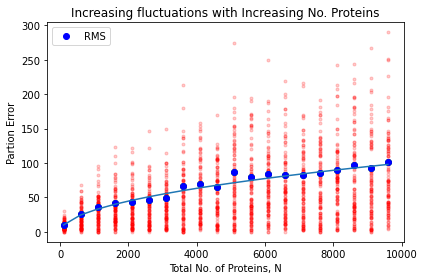

In [7]:
#N_proteins = [1000,2000,3000]

daughter_cells = ['A','B']

N_cells = 100 # How many times will division occur


x_list = []
y_list = []

n_protein = 100
while n_protein <10000:
  I_tot = n_protein
  alpha = I_tot/n_protein
  I_diff = [] #Intensity Differences

  for cell in range(N_cells):
    proteins_assigned = protein_assigner(n_protein)
    cell_A = proteins_assigned.count('A') * alpha
    cell_B = proteins_assigned.count('B') * alpha
    I_diff.append((cell_A-cell_B)**2)
    plt.plot(cell_A+cell_B,(((cell_A-cell_B)**2)**0.5),
             '.',color = 'red',alpha = 0.2)
    
  mean_I_diff = np.mean(I_diff)
  sq_mean_I_diff = mean_I_diff**0.5
  plt.plot(n_protein,sq_mean_I_diff,'o',color = 'green')

  x_list.append(n_protein)
  y_list.append(sq_mean_I_diff)

  print(n_protein)
  n_protein +=500

plt.plot(x_list,y_list,'o',color = 'blue', label = 'RMS')
plt.plot(x_list, np.sqrt(x_list), label = 'theory')
plt.xlabel('Total No. of Proteins, N')
plt.ylabel('Partion Error')
plt.title('Increasing fluctuations with Increasing No. Proteins')
plt.legend()
plt.tight_layout()
#plt.savefig('protein_toss.png',dpi = 800)
plt.show()

0
1
2
3
4
5
6
7
8
9


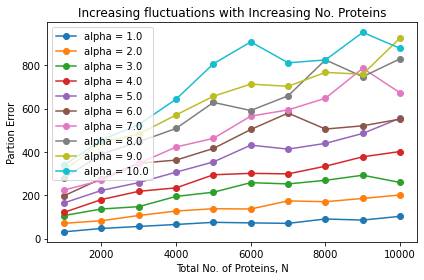

In [11]:
#N_proteins = [1000,2000,3000]

daughter_cells = ['A','B']

N_cells =100 # How many times will division occur

for jj in range(10):
  print(jj)
  jj = jj+1
  x_list = []
  y_list = []

  n_protein = 1000
  while n_protein <=10000:
    I_tot = n_protein
    alpha = I_tot/n_protein*jj
    I_diff = [] #Intensity Differences

    for cell in range(N_cells):
      proteins_assigned = protein_assigner(n_protein)
      cell_A = proteins_assigned.count('A') * alpha
      cell_B = proteins_assigned.count('B') * alpha
      I_diff.append((cell_A-cell_B)**2)

      
    mean_I_diff = np.mean(I_diff)
    sq_mean_I_diff = mean_I_diff**0.5
    #plt.plot(n_protein,sq_mean_I_diff,'o',color = 'green')

    x_list.append(n_protein)
    y_list.append(sq_mean_I_diff)

    #print(n_protein)
    n_protein +=1000

  plt.plot(x_list,y_list,'o-', label = 'alpha = '+str(alpha))
plt.xlabel('Total No. of Proteins, N')
plt.ylabel('Partion Error')
plt.title('Increasing fluctuations with Increasing No. Proteins')
plt.legend()
plt.tight_layout()
#plt.savefig('protein_toss.png',dpi = 800)
plt.show()